In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fb_ads = pd.read_csv('facebook_ads_data (2.0).csv')
fb_ads

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [5]:
#facebook_ads.info()

In [8]:
grouped_df = fb_ads.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum().reset_index()
grouped_df

,ad_date,total_spend,total_impressions,total_clicks,total_value
0,2020-11-11,1.89,1800,45,2.38
1,2020-11-12,23.00,10473,397,21.13
2,2020-11-13,6.36,11669,451,9.77
3,2020-11-14,7.27,5005,392,12.67
4,2020-11-15,6.98,12465,657,10.96
...,...,...,...,...,...
542,2022-10-29,714.03,33358,115,680.34
543,2022-10-30,335.91,27562,69,472.61
544,2022-10-31,227.45,6054,58,191.87
545,2022-11-01,0.00,0,0,0.00


In [11]:
grouped_df['cpc'] = grouped_df['total_spend'] / grouped_df['total_clicks']
grouped_df['ctr'] = grouped_df['total_clicks'] / grouped_df['total_impressions']
grouped_df['cpm'] = grouped_df['total_spend'] / grouped_df['total_impressions']*1000
grouped_df['romi'] = grouped_df['total_value'] / grouped_df['total_spend']
grouped_df

,ad_date,total_spend,total_impressions,total_clicks,total_value,cpc,ctr,cpm,romi
0,2020-11-11,1.89,1800,45,2.38,0.042000,0.025000,1.050000,1.259259
1,2020-11-12,23.00,10473,397,21.13,0.057935,0.037907,2.196123,0.918696
2,2020-11-13,6.36,11669,451,9.77,0.014102,0.038649,0.545034,1.536164
3,2020-11-14,7.27,5005,392,12.67,0.018546,0.078322,1.452547,1.742779
4,2020-11-15,6.98,12465,657,10.96,0.010624,0.052708,0.559968,1.570201
...,...,...,...,...,...,...,...,...,...
542,2022-10-29,714.03,33358,115,680.34,6.208957,0.003447,21.405060,0.952817
543,2022-10-30,335.91,27562,69,472.61,4.868261,0.002503,12.187432,1.406954
544,2022-10-31,227.45,6054,58,191.87,3.921552,0.009580,37.570202,0.843570
545,2022-11-01,0.00,0,0,0.00,NaN,NaN,NaN,NaN


In [12]:
grouped_df['ad_date'] = pd.to_datetime(grouped_df['ad_date'])
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            547 non-null    datetime64[ns]
 1   total_spend        547 non-null    float64       
 2   total_impressions  547 non-null    int64         
 3   total_clicks       547 non-null    int64         
 4   total_value        547 non-null    float64       
 5   cpc                538 non-null    float64       
 6   ctr                538 non-null    float64       
 7   cpm                538 non-null    float64       
 8   romi               538 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 38.6 KB


In [18]:
grouped_2021 = grouped_df[(grouped_df['ad_date'] >= '2021-01-01') & (grouped_df['ad_date'] <= '2021-12-31')]

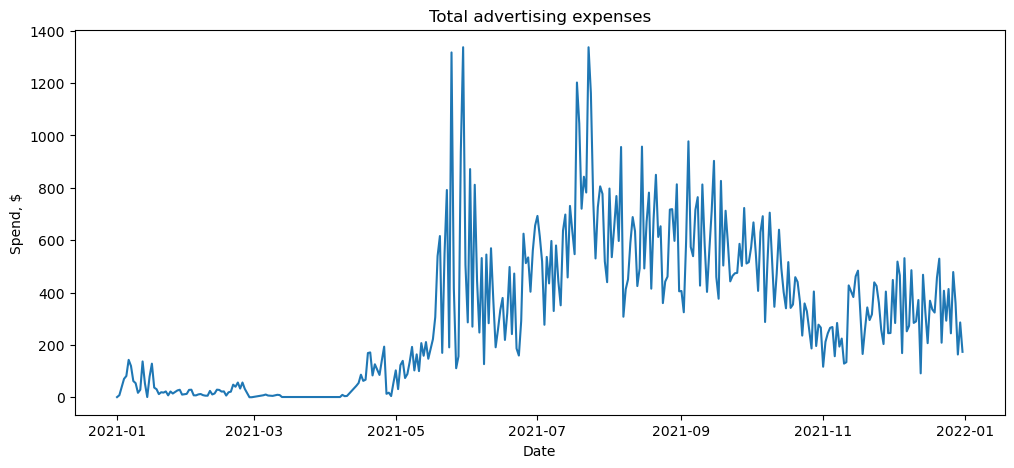

In [21]:
plt.figure(figsize=(12,5))
plt.plot(grouped_2021['ad_date'], grouped_2021['total_spend'])
plt.title('Total advertising expenses')
plt.xlabel('Date')
plt.ylabel('Spend, $')
plt.show()

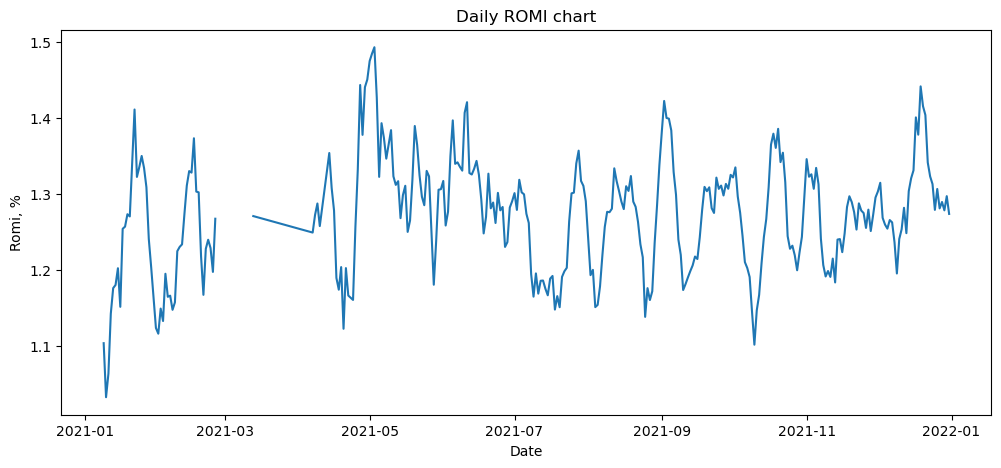

In [26]:
plt.figure(figsize=(12,5))
plt.plot(grouped_2021['ad_date'], grouped_2021['romi'].rolling(8).mean())
plt.title('Daily ROMI chart')
plt.xlabel('Date')
plt.ylabel('Romi, %')
plt.show()

In [28]:
grouped_df_2 = fb_ads.groupby('campaign_name')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum().reset_index()
grouped_df_2

,campaign_name,total_spend,total_impressions,total_clicks,total_value
0,Brand,539.92,893854,542,670.15
1,Crazy discounts,2175.29,1401511,19627,2583.59
2,Discounts,2856.39,1256069,33353,3516.27
3,Electronics,23920.42,7070770,51593,29169.38
4,Expansion,67212.82,3736092,37469,83288.66
5,Hobbies,11326.97,8146187,50611,13974.63
6,Lookalike,63631.09,21019388,220993,80234.70
7,New items,2936.97,1045294,16935,3742.05
8,Promos,4993.84,2216422,17315,8793.77
9,Trendy,1992.31,1392189,9725,3798.90


In [29]:
grouped_df_2['cpc'] = grouped_df_2['total_spend'] / grouped_df_2['total_clicks']
grouped_df_2['ctr'] = grouped_df_2['total_clicks'] / grouped_df_2['total_impressions']
grouped_df_2['cpm'] = grouped_df_2['total_spend'] / grouped_df_2['total_impressions']*1000
grouped_df_2['romi'] = grouped_df_2['total_value'] / grouped_df_2['total_spend']
grouped_df_2

,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,ctr,cpm,romi
0,Brand,539.92,893854,542,670.15,0.996162,0.000606,0.604036,1.241202
1,Crazy discounts,2175.29,1401511,19627,2583.59,0.110832,0.014004,1.552103,1.187699
2,Discounts,2856.39,1256069,33353,3516.27,0.085641,0.026553,2.274071,1.231019
3,Electronics,23920.42,7070770,51593,29169.38,0.463637,0.007297,3.383001,1.219434
4,Expansion,67212.82,3736092,37469,83288.66,1.793825,0.010029,17.990140,1.239178
5,Hobbies,11326.97,8146187,50611,13974.63,0.223805,0.006213,1.390463,1.233748
6,Lookalike,63631.09,21019388,220993,80234.70,0.287933,0.010514,3.027257,1.260935
7,New items,2936.97,1045294,16935,3742.05,0.173426,0.016201,2.809707,1.274119
8,Promos,4993.84,2216422,17315,8793.77,0.288411,0.007812,2.253109,1.760923
9,Trendy,1992.31,1392189,9725,3798.90,0.204865,0.006985,1.431063,1.906782


<Axes: xlabel='total_spend', ylabel='campaign_name'>

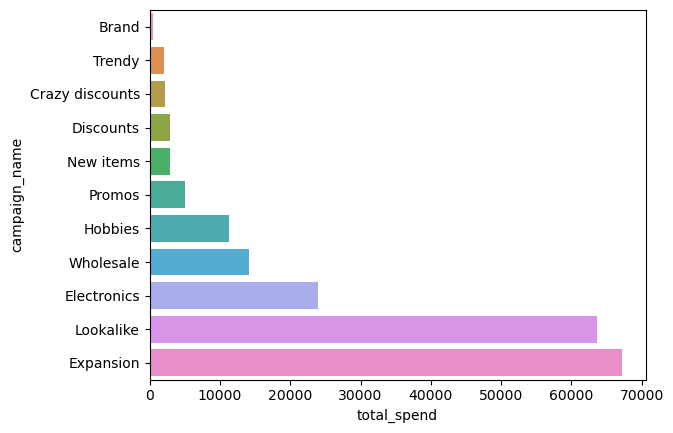

In [33]:
sns.barplot(data = grouped_df_2.sort_values('total_spend'), y = 'campaign_name', x = 'total_spend')

<Axes: xlabel='romi', ylabel='campaign_name'>

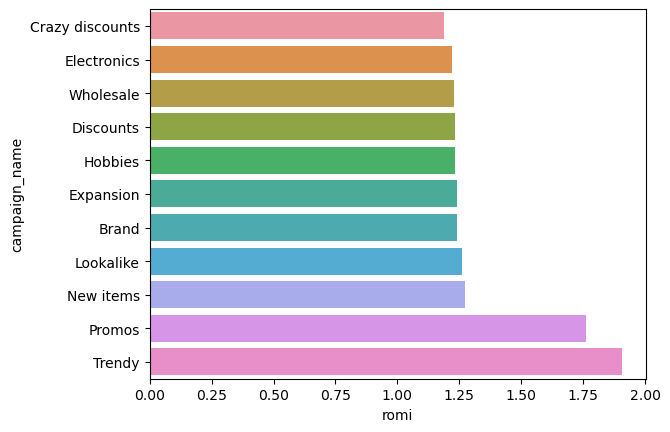

In [34]:
sns.barplot(data = grouped_df_2.sort_values('romi'), y = 'campaign_name', x = 'romi')

<Axes: xlabel='campaign_name', ylabel='romi'>

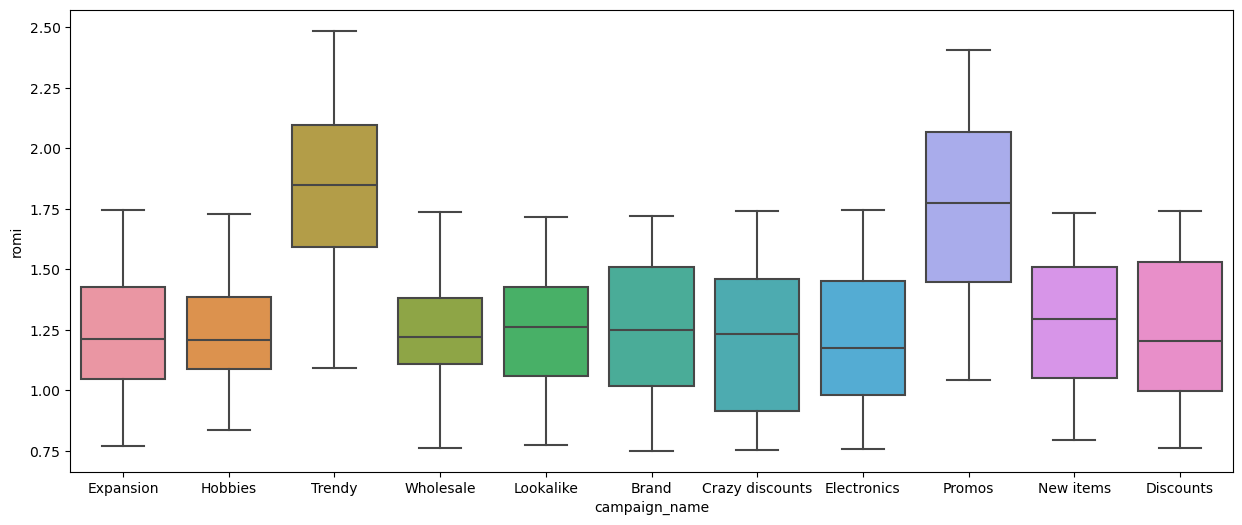

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(data = fb_ads, x = 'campaign_name', y = 'romi')

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='romi', ylabel='Count'>

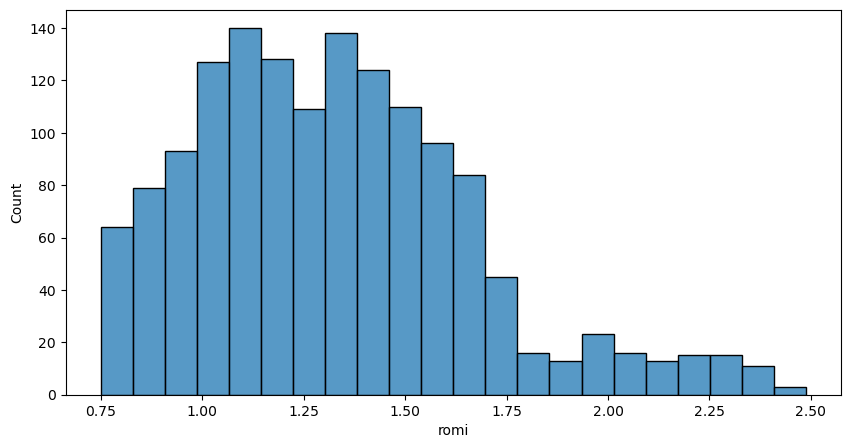

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data = fb_ads, x = 'romi' )

<Axes: >

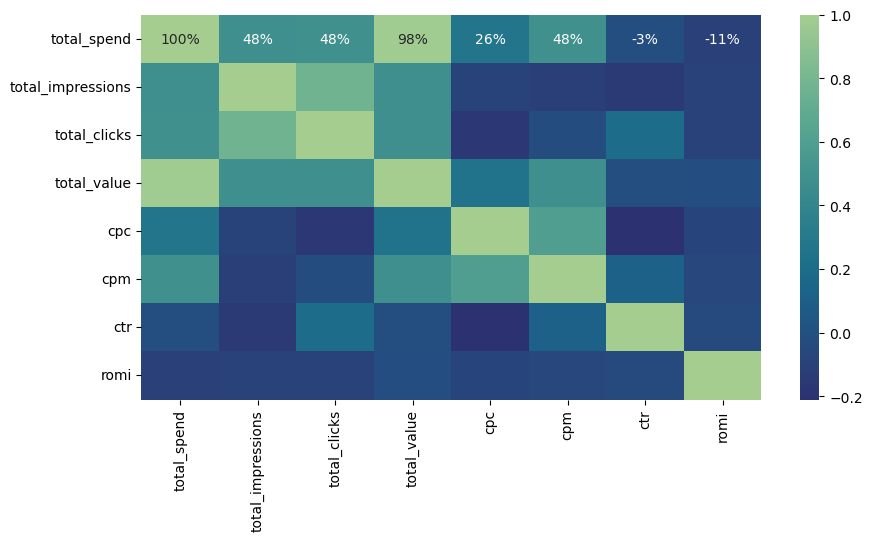

In [59]:
plt.figure(figsize=(10,5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(fb_ads.corr(numeric_only=True), annot=True, fmt='.0%', cmap='crest_r')

<Figure size 1200x900 with 0 Axes>

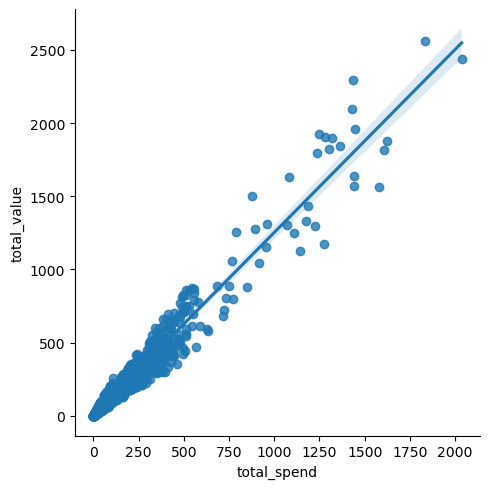

In [64]:
plt.figure(figsize=(12,9))
sns.lmplot(data = fb_ads, x = 'total_spend', y = 'total_value')